<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Doceria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
DF=pd.read_excel('/content/Bakery_Sales_Dataset.xlsx')


In [3]:
DF.head(3)

,Bakery_ID,Price_Per_Item,Marketing_Budget,Num_Customers,Temperature,Sales
0,1,2.5,1000,80,150,5250
1,2,2.0,800,60,140,3280
2,3,3.0,1200,95,160,6950


In [4]:
DF=DF.set_index('Bakery_ID')

In [5]:
DF.head(2)

,Price_Per_Item,Marketing_Budget,Num_Customers,Temperature,Sales
Bakery_ID,,,,,
1,2.5,1000,80,150,5250
2,2.0,800,60,140,3280


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 21
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price_Per_Item    21 non-null     float64
 1   Marketing_Budget  21 non-null     int64  
 2   Num_Customers     21 non-null     int64  
 3   Temperature       21 non-null     int64  
 4   Sales             21 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1008.0 bytes


In [7]:
DF.describe()

,Price_Per_Item,Marketing_Budget,Num_Customers,Temperature,Sales
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.519048,982.142857,70.952381,147.142857,5133.809524
std,0.324991,122.765747,11.791845,9.296697,1116.887309
min,2.000000,750.000000,55.000000,130.000000,3030.000000
25%,2.300000,900.000000,60.000000,140.000000,4350.000000
50%,2.500000,1000.000000,70.000000,150.000000,5250.000000
75%,2.800000,1050.000000,80.000000,155.000000,5790.000000
max,3.000000,1200.000000,95.000000,160.000000,6950.000000


In [8]:
 !pip install yellowbrick


In [10]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn.cluster import k_means,dbscan,mean_shift,estimate_bandwidth
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale,minmax_scale,StandardScaler

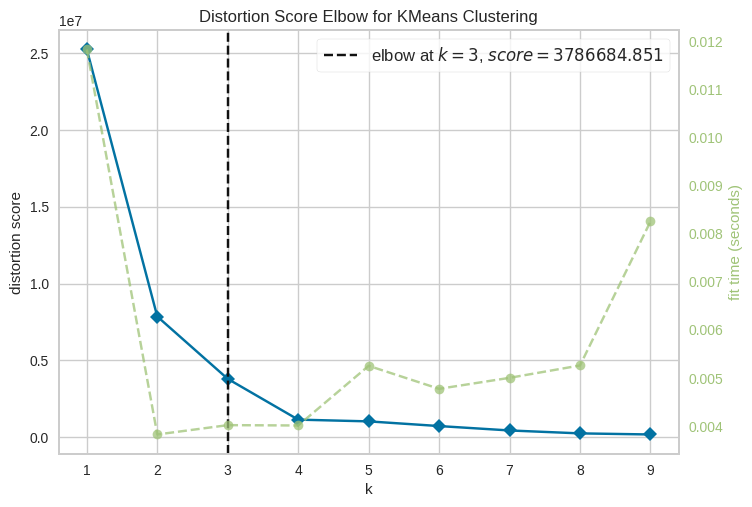

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

In [12]:
kelbow_visualizer(KMeans(),DF,k=(1,10))

In [14]:
from ctypes import DEFAULT_MODE
clustermetrics=silhouette_score,davies_bouldin_score,calinski_harabasz_score
cluster_metrics_results=[]
for k in range(3,10):
    model=KMeans(n_clusters=k)
    model.fit_predict(DF)
    cluster_results_dict={'k':k}
    cluster_results_dict['intertia']=model.inertia_
    for metric in clustermetrics:
        cluster_results_dict[metric.__name__]=metric(DF,model.labels_)
    cluster_metrics_results.append(cluster_results_dict)
cluster_metrics_results

[{'k': 3,
  'intertia': 3786684.8512500003,
  'silhouette_score': 0.5926000665906473,
  'davies_bouldin_score': 0.4454088829930818,
  'calinski_harabasz_score': 51.0240521564393},
 {'k': 4,
  'intertia': 1129022.1712500001,
  'silhouette_score': 0.6602133762607763,
  'davies_bouldin_score': 0.3701561296249375,
  'calinski_harabasz_score': 121.0889346285111},
 {'k': 5,
  'intertia': 938695.0804166667,
  'silhouette_score': 0.5885530164428133,
  'davies_bouldin_score': 0.31944480498665306,
  'calinski_harabasz_score': 103.61614063005108},
 {'k': 6,
  'intertia': 633774.4533333333,
  'silhouette_score': 0.5563601732138755,
  'davies_bouldin_score': 0.3783548185230055,
  'calinski_harabasz_score': 116.54419421398606},
 {'k': 7,
  'intertia': 538120.01375,
  'silhouette_score': 0.5139860418878505,
  'davies_bouldin_score': 0.3012551860635315,
  'calinski_harabasz_score': 107.17309249663019},
 {'k': 8,
  'intertia': 352425.1058333333,
  'silhouette_score': 0.5023429658694338,
  'davies_bould

In [15]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Purples',subset=['silhouette_score','davies_bouldin_score'])

,intertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
3,3786684.851250,0.592600,0.445409,51.024052
4,1129022.171250,0.660213,0.370156,121.088935
5,938695.080417,0.588553,0.319445,103.616141
6,633774.453333,0.556360,0.378355,116.544194
7,538120.013750,0.513986,0.301255,107.173092
8,352425.105833,0.502343,0.401126,131.225200
9,162098.015000,0.493070,0.358634,232.198285


In [16]:
model=KMeans(n_clusters=4)
model.fit(DF)
DF['Cluster']=model.fit_predict(DF)
DF.head()

,Price_Per_Item,Marketing_Budget,Num_Customers,Temperature,Sales,Cluster
Bakery_ID,,,,,,
1,2.5,1000,80,150,5250,2
2,2.0,800,60,140,3280,3
3,3.0,1200,95,160,6950,1
4,2.2,950,75,135,4350,0
5,2.8,1100,70,150,5460,2


In [17]:
DF.to_csv('doceria.csv', index=False)
from google.colab import files
files.download('doceria.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
DF_para_ML=DF.drop('Cluster',axis=1)
DF_para_ML.head()


,Price_Per_Item,Marketing_Budget,Num_Customers,Temperature,Sales
Bakery_ID,,,,,
1,2.5,1000,80,150,5250
2,2.0,800,60,140,3280
3,3.0,1200,95,160,6950
4,2.2,950,75,135,4350
5,2.8,1100,70,150,5460


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler()
y=DF_para_ML['Sales']
x=DF_para_ML.drop('Sales',axis=1)
num_cols=x.select_dtypes(include=np.number).columns
x[num_cols]=scaler.fit_transform(x[num_cols])
x.head()


,Price_Per_Item,Marketing_Budget,Num_Customers,Temperature
Bakery_ID,,,,
1,0.5,0.555556,0.625,0.666667
2,0.0,0.111111,0.125,0.333333
3,1.0,1.000000,1.000,1.000000
4,0.2,0.444444,0.500,0.166667
5,0.8,0.777778,0.375,0.666667


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
!pip install xgboost

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Instanciar o modelo
xgb_model = XGBRegressor(n_estimators=2000, learning_rate=0.9, max_depth=3, random_state=42)

# Treinar o modelo
xgb_model.fit(x_train, y_train)

# Fazer previsões
y_pred_xgb = xgb_model.predict(x_test)

# Avaliar o modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor - Mean Squared Error:", mse_xgb)
print("XGBoost Regressor - R^2 Score:", r2_xgb)

XGBoost Regressor - Mean Squared Error: 212799.16249294282
XGBoost Regressor - R^2 Score: 0.6714967489242554


In [27]:
# Instanciar o modelo
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Treinar o modelo
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(x_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

Random Forest Regressor - Mean Squared Error: 235087.2455776438
Random Forest Regressor - R^2 Score: 0.6370900707988407


In [29]:
# Criar um DataFrame para a importância das features do XGBoost
xgb_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': xgb_model.feature_importances_
})

# Ordenar o DataFrame pela importância (do mais importante para o menos importante)
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print("Importância das Features - XGBoost Regressor")
print(xgb_importance_df)

Importância das Features - XGBoost Regressor
            Feature  Importance
0    Price_Per_Item    0.500730
1     Num_Customers    0.232669
2       Temperature    0.208108
3  Marketing_Budget    0.058492


In [31]:
xgb_importance_df.to_csv('xgb_importance_df.csv', index=False)
from google.colab import files
files.download('xgb_importance_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>